In [1]:
import pandas as pd

In [2]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np

In [3]:
obe_df = pd.read_csv(r"C:\Users\sivam\Python Prog\DataCourse\filtered_data.csv")

In [4]:
print("obesity:", obe_df.shape)

obesity: (1904, 6)


In [5]:
print(type(obe_df))

<class 'pandas.core.frame.DataFrame'>


In [6]:
print(obe_df.shape)

(1904, 6)


In [7]:
obe_df.head

<bound method NDFrame.head of        Country  Year Continent  Population  GDP per capita  \
0      Albania  2000    Europe     3089027     3860.804627   
1      Albania  2001    Europe     3060173     4299.546493   
2      Albania  2002    Europe     3051010     4661.402695   
3      Albania  2003    Europe     3039616     5000.049363   
4      Albania  2004    Europe     3026939     5427.732662   
...        ...   ...       ...         ...             ...   
1899  Zimbabwe  2011    Africa    12894323     2101.824051   
1900  Zimbabwe  2012    Africa    13115149     2375.927006   
1901  Zimbabwe  2013    Africa    13350378     2560.773267   
1902  Zimbabwe  2014    Africa    13586710     2612.455954   
1903  Zimbabwe  2015    Africa    13814642     2679.507615   

      Obesity among adults  
0                     12.8  
1                     13.3  
2                     13.9  
3                     14.4  
4                     15.0  
...                    ...  
1899                  

In [8]:
obe_df.describe()

,Year,Population,GDP per capita,Obesity among adults
count,1904.000000,1.904000e+03,1904.000000,1904.000000
mean,2007.500000,5.075583e+07,18094.113142,16.213393
std,4.610983,1.650247e+08,19389.828835,8.213384
min,2000.000000,3.331660e+05,434.835252,1.100000
25%,2003.750000,4.218751e+06,4614.709959,8.600000
50%,2007.500000,1.076918e+07,11155.012085,18.000000
75%,2011.250000,3.692124e+07,26366.811600,22.300000
max,2015.000000,1.379860e+09,141634.703800,36.700000


In [9]:
# Show missing value percentages
missing_percent = (obe_df.isnull().sum() / len(obe_df)) * 100
print(missing_percent)

Country                 0.0
Year                    0.0
Continent               0.0
Population              0.0
GDP per capita          0.0
Obesity among adults    0.0
dtype: float64


In [10]:
obe_df.isnull().sum()[obe_df.isnull().sum() > 0]

Series([], dtype: int64)

In [11]:
obe_df = obe_df.dropna(axis=1, how='all')

In [12]:
#Check how severe the missing data is
print("\n---- Missing Value Percentage ----")
print((obe_df.isnull().sum() / len(obe_df) * 100).round(2))


---- Missing Value Percentage ----
Country                 0.0
Year                    0.0
Continent               0.0
Population              0.0
GDP per capita          0.0
Obesity among adults    0.0
dtype: float64


In [13]:
print(obe_df.dtypes)
print(obe_df['Country'].unique())

Country                  object
Year                      int64
Continent                object
Population                int64
GDP per capita          float64
Obesity among adults    float64
dtype: object
['Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium' 'Benin' 'Bolivia' 'Botswana'
 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Cambodia' 'Cameroon' 'Canada'
 'Chile' 'China' 'Colombia' 'Congo Dem. Rep.' 'Congo Rep.' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cyprus' 'Czechia' 'Denmark' 'Ecuador' 'Egypt'
 'El Salvador' 'Eritrea' 'Estonia' 'Ethiopia' 'Finland' 'France' 'Gabon'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Honduras' 'Hungary'
 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Jordan' 'Kazakhstan' 'Kenya' 'Kuwait' 'Kyrgyz Republic' 'Latvia' 'Libya'
 'Lithuania' 'Luxembourg' 'Malaysia' 'Malta' 'Mauritius' 'Mexico'
 'Moldova' 'Mongolia' 'Montenegro' 'Morocco' 'Mozambique' 'Myanmar'
 'Na

In [23]:
# Fix for text column 'country'
if 'country' in obe_df.columns:
    # Check if mode exists (to avoid errors if the column is all NaNs)
    if not obe_df ['country'].mode().empty:
        most_frequent = obe_df['country'].mode()[0]
        obe_df['country'] = obe_df['country'].fillna(most_frequent)
        print(f"Filled missing values in 'country' with the most frequent category: {most_frequent}")
    else:
        print("Column 'country' is empty or all-NaN; could not fill missing values.")

In [24]:
# ~~Example: Convert numeric columns stored as strings~~
numeric_columns = ['Country']  # adjust as per your dataset
for col in numeric_columns:
    if col in obe_df.columns:
        obe_df[col] = pd.to_numeric(obe_df[col], errors='coerce')
        print(f"Converted '{col}' to numeric type.")

Converted 'Country' to numeric type.


In [25]:
# --- Identify Duplicates ---
duplicate_count = obe_df.duplicated().sum()
print(f"\n---- Duplicate Rows Found: {duplicate_count} ----")


---- Duplicate Rows Found: 0 ----


In [26]:
# --- Remove Duplicates ---
if duplicate_count > 0:
    obe_df = obe_df.drop_duplicates()
    print("Duplicate rows removed successfully.")

In [27]:
# --- Verify ---
print(f"Remaining rows after cleanup: {obe_df.shape[0]}")
import seaborn as sns

Remaining rows after cleanup: 1904


In [28]:
# --- Select numeric columns only ---
numeric_cols = obe_df.select_dtypes(include=['float64', 'int64']).columns

In [29]:
print(obe_df['Country'].describe())
print(obe_df['Country'].unique())

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Country, dtype: float64
[nan]


In [30]:
obe_df['Country'] = pd.to_numeric(obe_df['Country'], errors='coerce')
print(obe_df['Country'].isna().sum())

1904


In [31]:
obe_df['Country'] = obe_df['Country'].astype('category').cat.codes

| Country        | Obesity among adults   |
|:---------------|:-----------------------|
| United States  | 36.7                   |
| Kuwait         | 36.3                   |
| Saudi Arabia   | 34.1                   |
| Qatar          | 32.9                   |
| Jordan         | 32.5                   |
| Turkiye        | 31.4                   |
| New Zealand    | 31.3                   |
| Libya          | 31                     |
| Canada         | 30.7                   |
| Malta          | 30.6                   |
| Egypt          | 30.2                   |
| Australia      | 29.8                   |
| United Kingdom | 28.9                   |
| Uruguay        | 28.4                   |
| Chile          | 28.3                   |
| Hungary        | 28.1                   |
| Bahrain        | 28.1                   |
| Czechia        | 28                     |
| Argentina      | 28                     |
| Lithuania      | 27.9                   |
| Mexico         | 27.8         

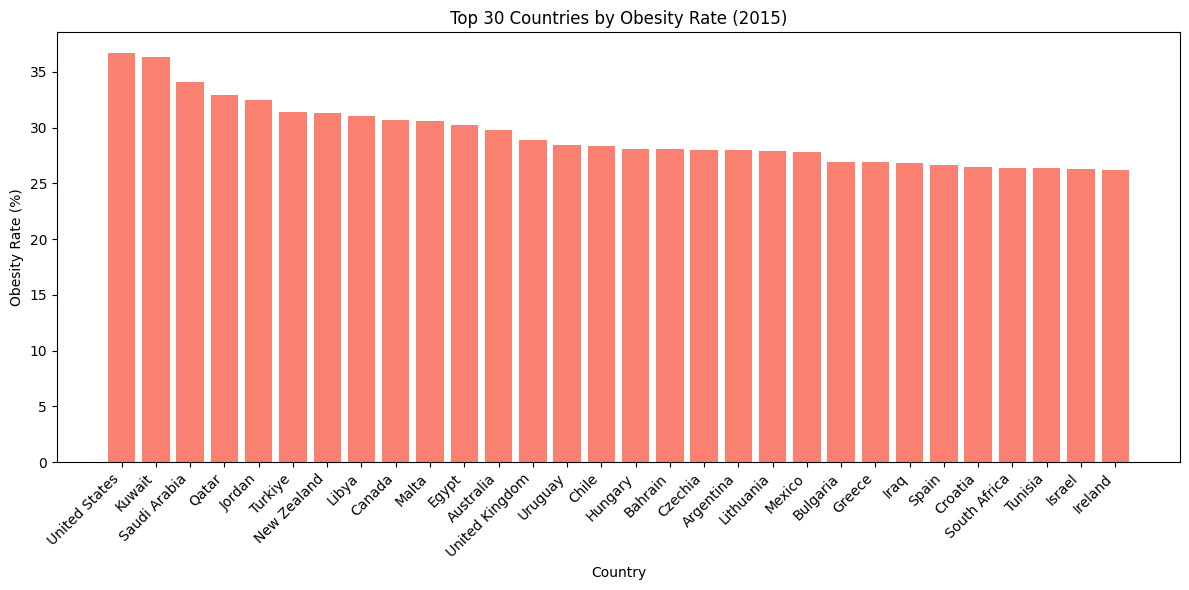

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the dataset
obe_df = pd.read_csv(r"C:\Users\sivam\Python Prog\DataCourse\filtered_data.csv")

# 2. Prepare the data
# Since this is time-series data, we pick the latest year (e.g., 2015) 
# to compare the countries fairly.
latest_year = obe_df['Year'].max()
df_latest = obe_df[obe_df['Year'] == latest_year].copy()

# Sort by 'Obesity among adults' to get the top 20
# (We sort values instead of counting them)
sorted_countries = df_latest.sort_values('Obesity among adults', ascending=False)
top_30_countries = sorted_countries.head(30)

# 3. Create the bar plot
plt.figure(figsize=(12, 6))
# We use 'Country' and 'Obesity among adults' for the axes
plt.bar(top_30_countries['Country'], top_30_countries['Obesity among adults'], color='salmon')
plt.xlabel('Country')
plt.ylabel('Obesity Rate (%)')
plt.title(f'Top 30 Countries by Obesity Rate ({latest_year})')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 4. Save the plot
plt.savefig('top_30_countries_obesity.png')

# 5. Display the table
# Selecting just the relevant columns for a clean table
print(top_30_countries[['Country', 'Obesity among adults']].to_markdown(index=False, numalign="left", stralign="left"))

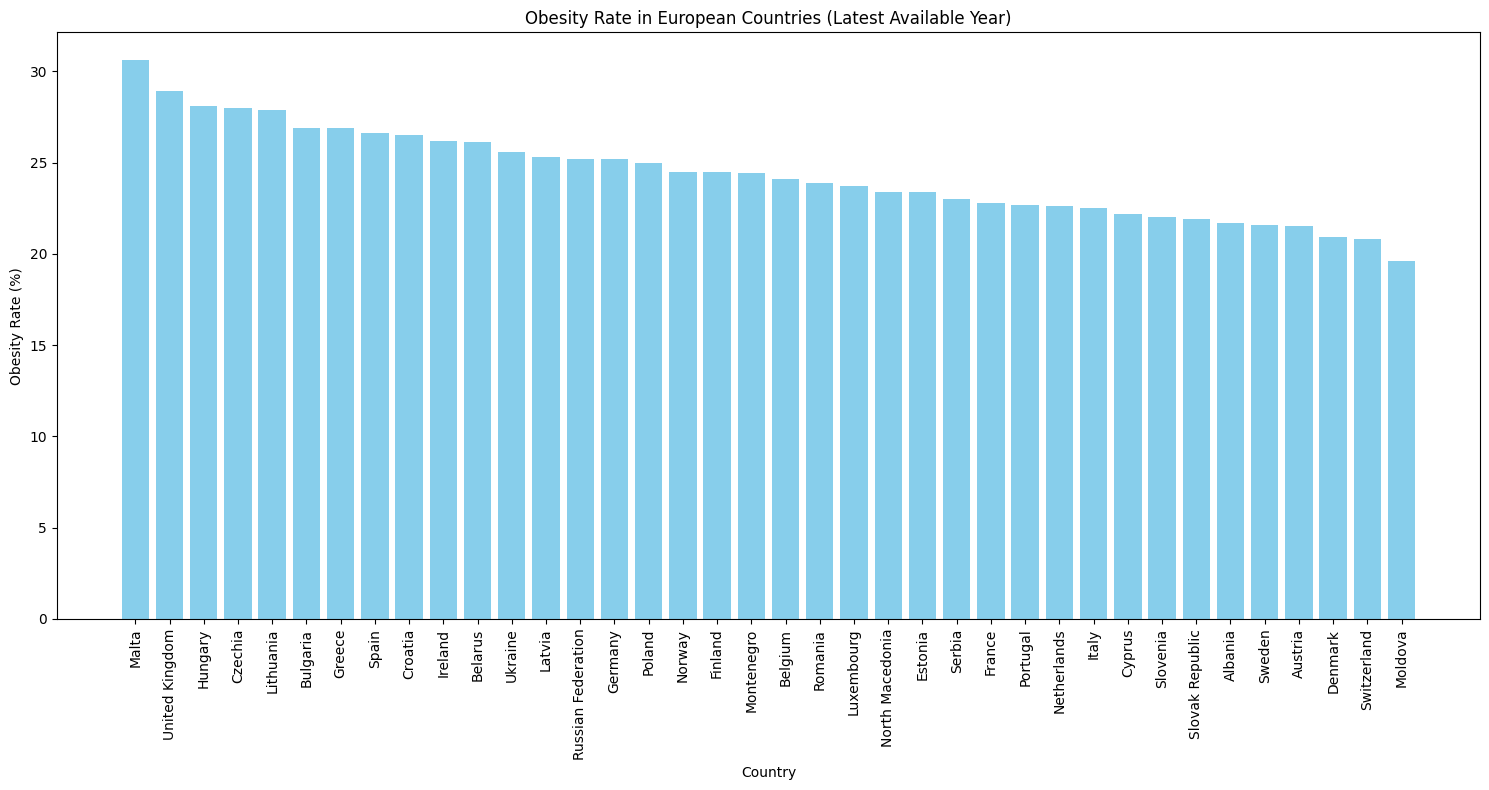

| Country            |   Obesity among adults |
|:-------------------|-----------------------:|
| Malta              |                   30.6 |
| United Kingdom     |                   28.9 |
| Hungary            |                   28.1 |
| Czechia            |                   28   |
| Lithuania          |                   27.9 |
| Bulgaria           |                   26.9 |
| Greece             |                   26.9 |
| Spain              |                   26.6 |
| Croatia            |                   26.5 |
| Ireland            |                   26.2 |
| Belarus            |                   26.1 |
| Ukraine            |                   25.6 |
| Latvia             |                   25.3 |
| Russian Federation |                   25.2 |
| Germany            |                   25.2 |
| Poland             |                   25   |
| Norway             |                   24.5 |
| Finland            |                   24.5 |
| Montenegro         |                  

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the dataset
obe_df = pd.read_csv(r"C:\Users\sivam\Python Prog\DataCourse\filtered_data.csv")

# 2. Filter for European countries
df_europe = obe_df[obe_df['Continent'] == 'Europe']

# 3. Get the latest year of data for each country
# We find the index of the max year for each country and select those rows
latest_year_idx = df_europe.groupby('Country')['Year'].idxmax()
df_latest = df_europe.loc[latest_year_idx].copy()

# 4. Sort by Obesity Rate (Highest to Lowest)
all_europe = df_latest.sort_values('Obesity among adults', ascending=False)

# 5. Create the bar plot
plt.figure(figsize=(15, 8))  # Wider figure to fit all countries
plt.bar(all_europe['Country'], all_europe['Obesity among adults'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Obesity Rate (%)')
plt.title(f'Obesity Rate in European Countries (Latest Available Year)')
plt.xticks(rotation=90)  # Rotate labels to make them readable
plt.tight_layout()

# Save the plot
plt.savefig('all_europe_obesity.png')
plt.show()

# 6. Display the table
print(all_europe[['Country', 'Obesity among adults']].to_markdown(index=False))

In [42]:
# 1. Load the original dataset
obe_df = pd.read_csv(r"C:\Users\sivam\Python Prog\DataCourse\filtered_data.csv")

# 2. Filter for rows where Continent is 'Europe'
df_europe = obe_df[obe_df['Continent'] == 'Europe']

# 3. Save the filtered data to a new CSV file
df_europe.to_csv('european_countries_obesity.csv', index=False)

# 4. (Optional) Verify the result
print(f"Saved {len(df_europe)} rows to 'european_countries_obesity.csv'")
print(df_europe.head())

Saved 608 rows to 'european_countries_obesity.csv'
   Country  Year Continent  Population  GDP per capita  Obesity among adults
0  Albania  2000    Europe     3089027     3860.804627                  12.8
1  Albania  2001    Europe     3060173     4299.546493                  13.3
2  Albania  2002    Europe     3051010     4661.402695                  13.9
3  Albania  2003    Europe     3039616     5000.049363                  14.4
4  Albania  2004    Europe     3026939     5427.732662                  15.0
